In [31]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import enum
import os
from pydantic import BaseModel

In [32]:
RESULTS_DIR = 'results_it2'
json_prefix = 'experiment_summary'

In [33]:
class ModelType(enum.Enum):
    LINEAR = "Linear Regression"
    SVR = "SVR"
    RANDOM_FOREST = "Random Forest"
    CNN = "CNN"
    HYB_NEURAL_SVR = 'Neural-SVR Hybrid'
    HYB_CNN_SVR = 'CNN-SVR Hybrid'
    HYB_LINEAR_SVR = 'Hybrid Model (Linear + SVR)'


class Experiment(BaseModel):
    name: str
    model_type: str
    mse: float
    r2: float


def list_experiments():
    return [f for f in os.listdir(RESULTS_DIR) if f.startswith(json_prefix) and f.endswith('.json')]


list_experiments()

['experiment_summary_org_num.json',
 'experiment_summary_volunteer_hours.json',
 'experiment_summary_op_years.json',
 'experiment_summary.json',
 'experiment_summary_donations.json']

In [34]:
regs = []

for filename in list_experiments():
    with open(os.path.join(RESULTS_DIR, filename), 'r') as f:
        data = json.load(f)
        print(f"Experiment: {data}")
        for model_type in ModelType:
            experiment = Experiment(

                name="base" if filename == f"{json_prefix}.json" else filename.replace(
                    f"{json_prefix}_", "").replace('.json', ''),
                model_type=model_type.value,
                mse=data[model_type.value]['mse']['mean'],
                r2=data[model_type.value]['r2']['mean']
            )
            regs.append(experiment)

# Convert to DataFrame
df = pd.DataFrame([exp.dict() for exp in regs])
df

Experiment: {'Linear Regression': {'mse': {'mean': 455280431.76056576, 'std': 0.0, 'min': 455280431.76056576, 'max': 455280431.76056576, 'runs': 18}, 'r2': {'mean': 0.2326445060510437, 'std': 0.0, 'min': 0.2326445060510437, 'max': 0.2326445060510437, 'runs': 18}}, 'SVR': {'mse': {'mean': 358919888.80923307, 'std': 5.960464477539063e-08, 'min': 358919888.8092331, 'max': 358919888.8092331, 'runs': 18}, 'r2': {'mean': 0.395056037220247, 'std': 5.551115123125783e-17, 'min': 0.39505603722024707, 'max': 0.39505603722024707, 'runs': 18}}, 'Random Forest': {'mse': {'mean': 875246828.3277566, 'std': 8015119.450573006, 'min': 860507388.5113305, 'max': 887783303.0578278, 'runs': 18}, 'r2': {'mean': -0.47519070758550463, 'std': 0.013509137480982042, 'min': -0.49632039401123595, 'max': -0.4503480187022433, 'runs': 18}}, 'CNN': {'mse': {'mean': 427898296.2249991, 'std': 11201902.23480435, 'min': 414465576.10373783, 'max': 456323172.28528965, 'runs': 18}, 'r2': {'mean': 0.2787959122470436, 'std': 0.0

/tmp/ipykernel_1535435/686877282.py:19: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  df = pd.DataFrame([exp.dict() for exp in regs])


,name,model_type,mse,r2
0,org_num,Linear Regression,4.552804e+08,0.232645
1,org_num,SVR,3.589199e+08,0.395056
2,org_num,Random Forest,8.752468e+08,-0.475191
3,org_num,CNN,4.278983e+08,0.278796
4,org_num,Neural-SVR Hybrid,3.868299e+08,0.348015
5,org_num,CNN-SVR Hybrid,3.834295e+08,0.353746
6,org_num,Hybrid Model (Linear + SVR),2.647271e+08,0.553814
7,volunteer_hours,Linear Regression,1.669021e+09,-24.335997
8,volunteer_hours,SVR,2.141339e+08,-2.250586
9,volunteer_hours,Random Forest,9.143820e+07,-0.388046


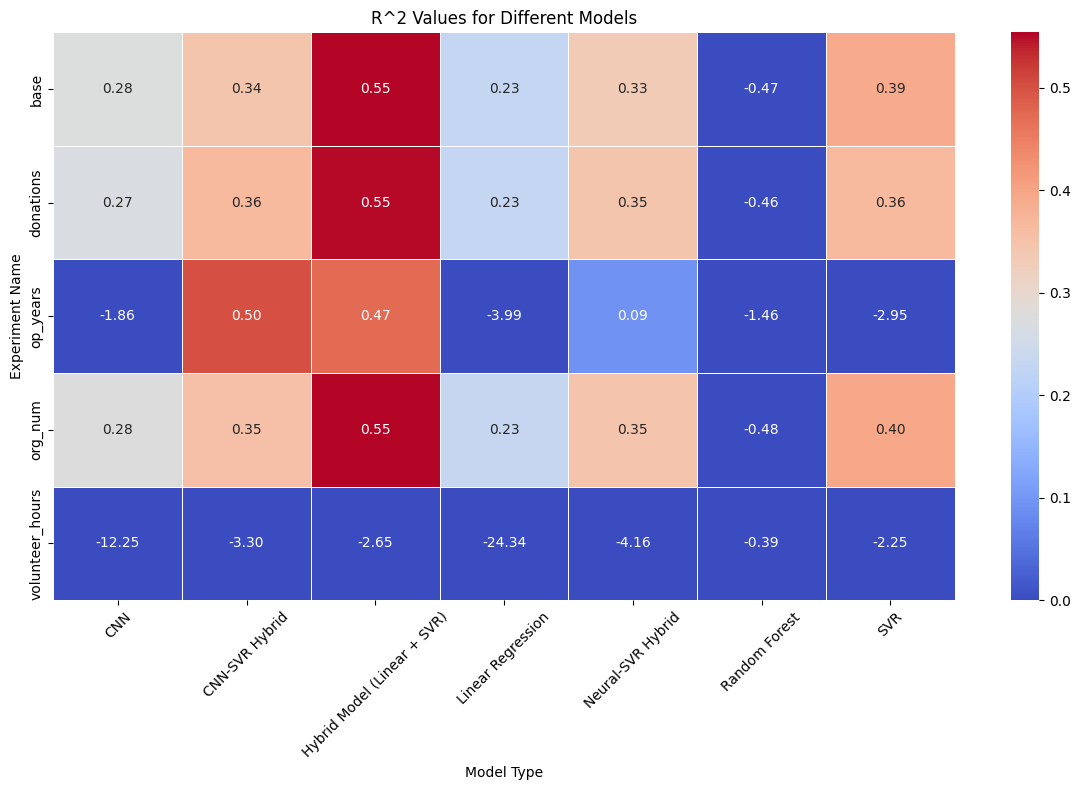

In [35]:
# Plotting the results R^2 first
# create an adjacency matrix for the models x name x r2
pivot_r2 = df.pivot(index='name', columns='model_type', values='r2')
pivot_r2 = pivot_r2.fillna(0)

# Create a copy for display values (actual R² values)
pivot_r2_display = pivot_r2.copy()

# Create a copy for coloring (negative values set to 0)
pivot_r2_color = pivot_r2.copy()
pivot_r2_color[pivot_r2_color < 0] = 0

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_r2_color, annot=pivot_r2_display,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('R^2 Values for Different Models')
plt.xlabel('Model Type')
plt.ylabel('Experiment Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('r2_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

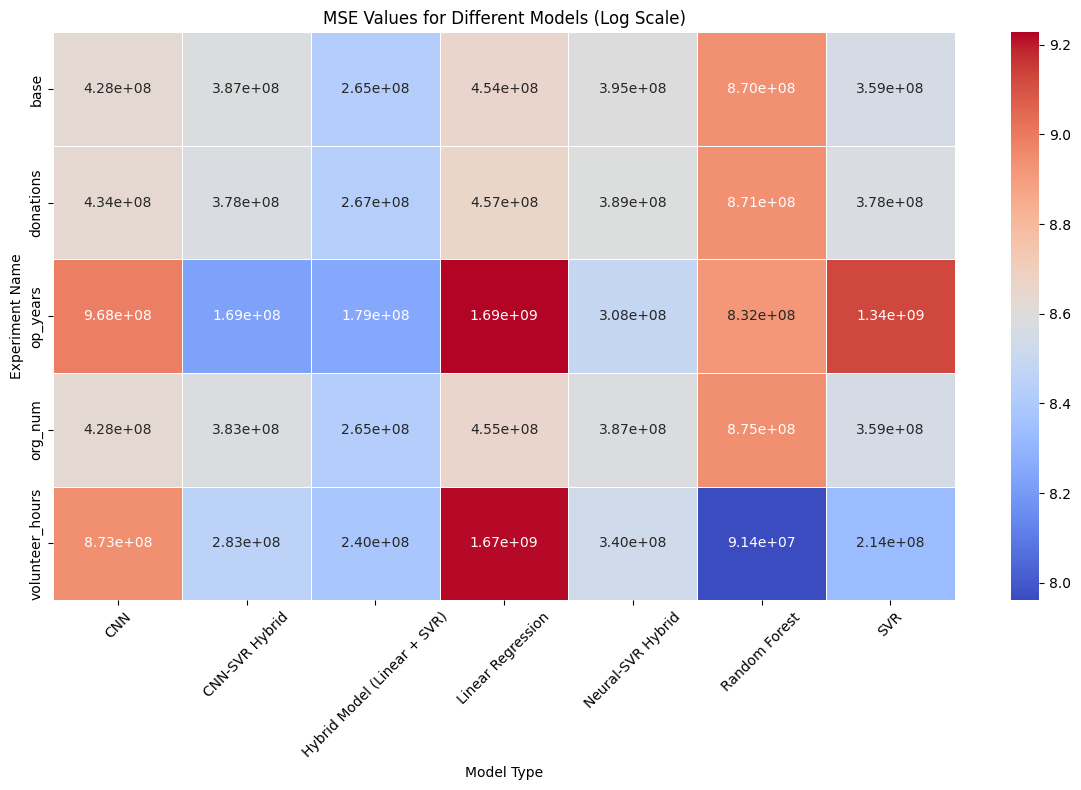

In [ ]:
# plot mse with log scale
pivot_mse = df.pivot(index='name', columns='model_type', values='mse')
pivot_mse = pivot_mse.fillna(0)

# Create a copy for display values (actual MSE values)
pivot_mse_display = pivot_mse.copy()

# Create a copy for coloring - apply log transformation
pivot_mse_color = np.log10(pivot_mse + 1)  # Adding 1 to avoid log(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_mse_color, annot=pivot_mse_display,
            cmap='coolwarm', fmt=".2e", linewidths=.5)
plt.title('MSE Values for Different Models (Log Scale)')
plt.xlabel('Model Type')
plt.ylabel('Experiment Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mse_heatmap_log.png', dpi=300, bbox_inches='tight')
plt.show()